#### EDA for ECG/EEG data for each patient 
Investigate the EEG data for each patient throughout their sleep to discover general trend as well as individual differences. 

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mne
import wfdb
%load_ext autoreload
%autoreload 2

read all patient data into one big list of dataframes

In [38]:
lifecard_dfs = []
for i in range(2, 4):
    lifecard = mne.io.read_raw_edf(f"files/ucddb00{i}_lifecard.edf")
    lifecard_dfs.append(lifecard.to_data_frame())
for i in range(5, 10):
    lifecard = mne.io.read_raw_edf(f"files/ucddb00{i}_lifecard.edf")
    lifecard_dfs.append(lifecard.to_data_frame())
for i in range(10, 16):
    lifecard = mne.io.read_raw_edf(f"files/ucddb0{i}_lifecard.edf")
    lifecard_dfs.append(lifecard.to_data_frame())
for i in range(17, 29):
    lifecard = mne.io.read_raw_edf(f"files/ucddb0{i}_lifecard.edf")
    lifecard_dfs.append(lifecard.to_data_frame())

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb002_lifecard.edf...
EDF file detected


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb003_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb005_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb006_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb007_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb008_lifecard.edf...
EDF file dete

invastigate individual EEG data

In [17]:
lifecard7 = mne.io.read_raw_edf("files/ucddb007_lifecard.edf")
df7 = lifecard7.to_data_frame()
df7

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb007_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


,time,chan 1,chan 2,chan 3
0,0.000000,4500.610501,4500.610501,4500.610501
1,0.007812,4500.610501,4500.610501,4500.610501
2,0.015625,4500.610501,4500.610501,4500.610501
3,0.023438,4500.610501,4500.610501,4500.610501
4,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
3801595,29699.960938,4976.800977,4908.424908,5062.271062
3801596,29699.968750,4974.358974,4908.424908,5064.713065
3801597,29699.976562,4971.916972,4908.424908,5067.155067
3801598,29699.984375,4969.474969,4918.192918,5050.061050


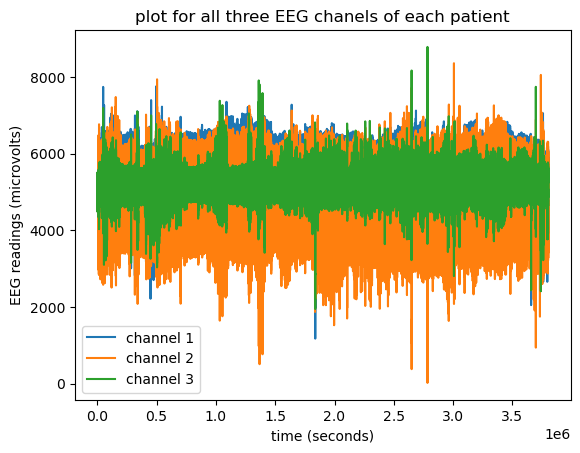

In [20]:
plt.plot(df7['chan 1'], label='channel 1')
plt.plot(df7['chan 2'], label='channel 2')
plt.plot(df7['chan 3'], label='channel 3')
plt.title("plot for all three EEG chanels of each patient")
plt.xlabel("time (seconds)")
plt.ylabel("EEG readings (microvolts)")
plt.legend()

it is suspected that there are more repeated data than clarified on the data description page. each patient has three channels of ECG recorded through out a sleep cycle that should have different readings from each other. 
There are a lot of zero readings at the end the sleep cycle, which should probably be imputed somehow. 
It is worth summarizing the time series data into one number and compare it with patient details. 
More research to be done with regards to the relationship between ECG readings and personal health data.

#### summary statistics

##### caculate stationary stats from time series data for each patient and concatenate all patients data into one dataframe.

In [40]:
# calculate mean and standard deviation for each channel of each patient

means = []
stds = []
for df in lifecard_dfs:
    means.append(np.array(df.mean()))
    stds.append(np.array(df.std()))
    means_arr = np.array(means)
    stds_arr = np.array(stds)


In [44]:
# make 2d arrays into dataframes 
means_df = pd.DataFrame(means_arr)
stds_df = pd.DataFrame(stds_arr)

In [46]:
means_df

,0,1,2,3
0,13769.996094,5000.984900,5016.301263,5016.301263
1,14549.996094,4948.421566,4969.934492,4984.875020
2,14579.996094,4978.634585,5001.180593,4973.285464
3,15209.996094,4977.792532,5005.712675,4966.811545
4,14849.996094,4981.992873,5004.192557,4976.508828
5,15059.996094,4951.378835,4978.237108,4985.114291
6,14489.996094,4984.593565,5006.628982,4978.208480
7,14669.996094,4956.558889,4981.050098,4988.765057
8,14699.996094,4980.693594,5008.307880,4972.731531
9,14849.996094,4979.746049,5002.006352,4975.581141


Text(0, 0.5, 'average EEG reading')

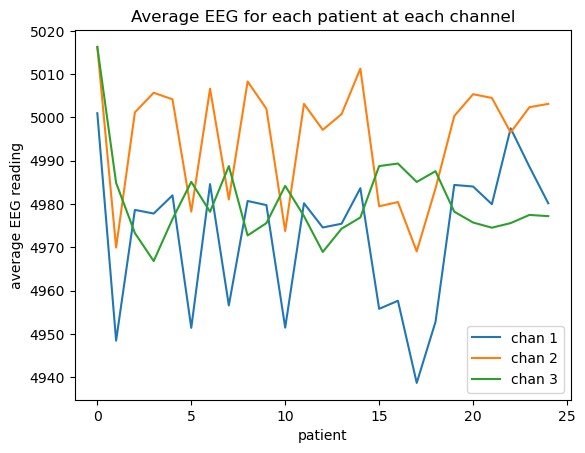

In [55]:
# plot the mean reading of EEG for each patient
plt.plot(means_df[1],label = 'chan 1')
plt.plot(means_df[2],label = 'chan 2')
plt.plot(means_df[3],label = 'chan 3')
plt.legend()
plt.title('Average EEG for each patient at each channel')
plt.xlabel('patient')
plt.ylabel('average EEG reading')

channel 1 and 2 have similar trends and channel 3 has the opposite trend compared to those two channels. This means that when we are trying to do dimension reduction in the future, we can basically keep one channel and discard the other two because they have indicative power of each other. 

Text(0, 0.5, 'standard deviation of EEG reading')

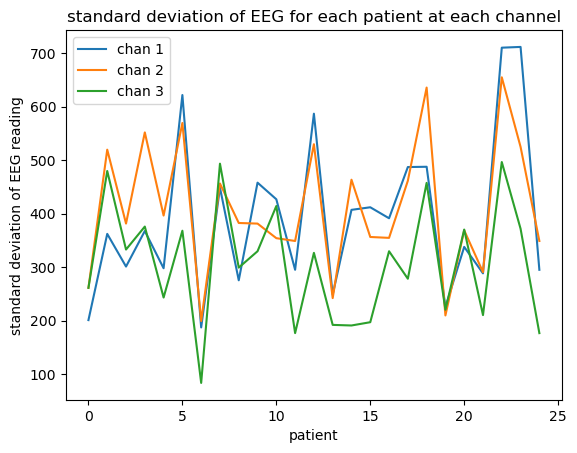

In [56]:
# plot the standard deviation of reading of EEG for each patient
plt.plot(stds_df[1],label = 'chan 1')
plt.plot(stds_df[2],label = 'chan 2')
plt.plot(stds_df[3],label = 'chan 3')
plt.legend()
plt.title('standard deviation of EEG for each patient at each channel')
plt.xlabel('patient')
plt.ylabel('standard deviation of EEG reading')

In [57]:
pd.read_excel("files/SubjectDetails.xls")

,S/No,Study Number,Height (cm),Weight (kg),Gender,PSG Start Time,PSG AHI,BMI,Age,Epworth Sleepiness Score,Study Duration (hr),Sleep Efficiency (%),Unnamed: 12,No of data blocks in EDF
0,1,UCDDB002,172,100.3,M,0:11:04,23,33.9,54,16,6.2,84,NaN,22470
1,2,UCDDB003,179,102.0,M,23:07:50,51,31.8,48,13,7.3,81,NaN,26478
2,3,UCDDB005,176,100.4,M,23:28:42,13,32.4,65,19,6.9,63,NaN,24798
3,4,UCDDB006,185,103.5,M,23:57:14,31,30.2,52,3,6.7,89,NaN,24267
4,5,UCDDB007,183,84.0,M,23:30:22,12,25.1,47,15,6.8,90,NaN,24405
5,6,UCDDB008,145,59.8,F,23:29:11,5,28.4,63,1,6.4,64,NaN,23041
6,7,UCDDB009,180,101.5,M,22:35:22,12,31.3,52,19,7.7,80,NaN,27759
7,8,UCDDB010,174,119.0,M,22:51:18,34,39.3,38,2,7.6,92,NaN,27211
8,9,UCDDB011,188,101.0,M,22:47:38,8,28.6,51,8,7.5,60,NaN,27030
9,10,UCDDB012,179,97.5,M,23:23:21,25,30.4,51,16,7.2,85,NaN,25941


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [14]:
# df7.index = pd.to_datetime(df7.index, infer_datetime_format=True)
# df7

/var/folders/3y/rj0wvhn13655x580fcqm_y080000gn/T/ipykernel_80707/1401039759.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df7.index = pd.to_datetime(df7.index, infer_datetime_format=True)


,time,chan 1,chan 2,chan 3
1970-01-01 00:00:00.000000000,0.000000,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000001,0.007812,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000002,0.015625,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000003,0.023438,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000004,0.031250,4500.610501,4500.610501,4500.610501
...,...,...,...,...
1970-01-01 00:00:00.003801595,29699.960938,4976.800977,4908.424908,5062.271062
1970-01-01 00:00:00.003801596,29699.968750,4974.358974,4908.424908,5064.713065
1970-01-01 00:00:00.003801597,29699.976562,4971.916972,4908.424908,5067.155067
1970-01-01 00:00:00.003801598,29699.984375,4969.474969,4918.192918,5050.061050


In [19]:
df7['time'] = pd.to_datetime(df7['time'])
df7.set_index('time', inplace= True, drop=True)

In [20]:
df7

,chan 1,chan 2,chan 3
time,,,
1970-01-01 00:00:00.000000000,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000000,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000000,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000000,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000000,4500.610501,4500.610501,4500.610501
...,...,...,...
1970-01-01 00:00:00.000029699,4976.800977,4908.424908,5062.271062
1970-01-01 00:00:00.000029699,4974.358974,4908.424908,5064.713065
1970-01-01 00:00:00.000029699,4971.916972,4908.424908,5067.155067


In [21]:
# filter out the beginning and end noise values
index_values_to_filter = ['1970-01-01 00:00:00.000000000', '1970-01-01 00:00:00.000029699']
df7_filtered = df7[~df7.index.isin(index_values_to_filter)]
df7_filtered

,chan 1,chan 2,chan 3
time,,,
1970-01-01 00:00:00.000000001,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000001,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000001,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000001,4500.610501,4500.610501,4500.610501
1970-01-01 00:00:00.000000001,4500.610501,4500.610501,4500.610501
...,...,...,...
1970-01-01 00:00:00.000029698,5025.641026,4974.358974,5050.061050
1970-01-01 00:00:00.000029698,5052.503053,4967.032967,5084.249084
1970-01-01 00:00:00.000029698,5081.807082,4959.706960,5120.879121


In [23]:
df7.isna().any()

chan 1    False
chan 2    False
chan 3    False
dtype: bool

In [25]:
df7.drop(columns=['chan 2', 'chan 3'])

,chan 1
time,
1970-01-01 00:00:00.000000000,4500.610501
1970-01-01 00:00:00.000000000,4500.610501
1970-01-01 00:00:00.000000000,4500.610501
1970-01-01 00:00:00.000000000,4500.610501
1970-01-01 00:00:00.000000000,4500.610501
...,...
1970-01-01 00:00:00.000029699,4976.800977
1970-01-01 00:00:00.000029699,4974.358974
1970-01-01 00:00:00.000029699,4971.916972


It seems like there are a lot of repeated values in each time series EEG file for a patient, which could be due to the fact that the time intervals are really small. 

In [28]:
from statsmodels.tsa.seasonal import STL
stl = STL(df7['chan 1'], period=8)  # there are 8 different stages of sleep according to the _stage.txt files
result = stl.fit()

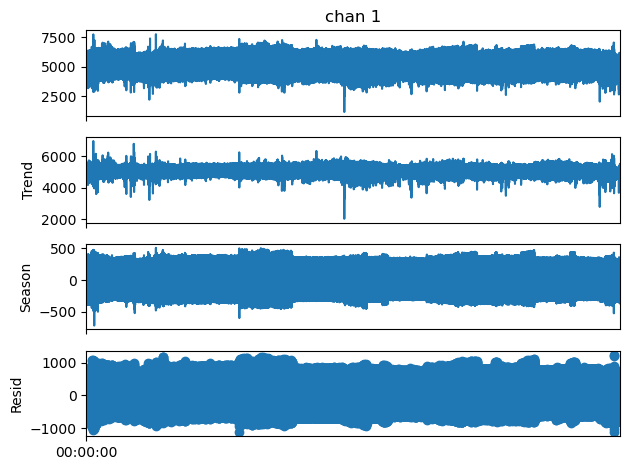

In [29]:
fig = result.plot()
plt.show()

According to research, the EEG readings can differ at each stage of sleep. Specifically, the EEG readings are the highest during REM, almost as high as that of the awake stage. Hence, it is to easy to identify REM stage on the seasonal decomposition. We can investigate if the time stamps of REM stage align with the episodes of apnea. 
https://www.ncbi.nlm.nih.gov/books/NBK10996/#:~:text=Following%20a%20period%20of%20slow,state%20(see%20Figure%2028.5).

In [36]:
# access the decomposed components 
trend_component = result.trend
seasonal_component = result.seasonal
residual_component = result.resid

In [39]:
lifecard_dfs

[                 time       chan 1       chan 2       chan 3
 0            0.000000  4500.610501  4500.610501  4500.610501
 1            0.007812  4500.610501  4500.610501  4500.610501
 2            0.015625  4500.610501  4500.610501  4500.610501
 3            0.023438  4500.610501  4500.610501  4500.610501
 4            0.031250  4500.610501  4500.610501  4500.610501
 ...               ...          ...          ...          ...
 3525115  27539.960938  7074.481074  6473.748474  6473.748474
 3525116  27539.968750  7804.639805  7203.907204  7203.907204
 3525117  27539.976562  7260.073260  6700.854701  6700.854701
 3525118  27539.984375  5770.451770  5282.051282  5282.051282
 3525119  27539.992188  4964.590965  4588.522589  4588.522589
 
 [3525120 rows x 4 columns],
                  time       chan 1       chan 2       chan 3
 0            0.000000  4500.610501  4500.610501  4500.610501
 1            0.007812  4500.610501  4500.610501  4500.610501
 2            0.015625  4500.610501  45

In [41]:
len(lifecard_dfs)

25

ucddb007_lifecard.edf

In [60]:
def eeg_seasonal_decomp(filepath):
    #read file
    lifecard = mne.io.read_raw_edf(filepath)
    df = lifecard.to_data_frame()
    # set index to datetime
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace= True, drop=True)
    stl = STL(df['chan 1'], period=8)  # there are 8 different stages of sleep according to the _stage.txt files
    result = stl.fit()
    fig = result.plot()
    plt.show()

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb007_lifecard.edf...
EDF file detected
Setting channel info structure...


Creating raw.info structure...


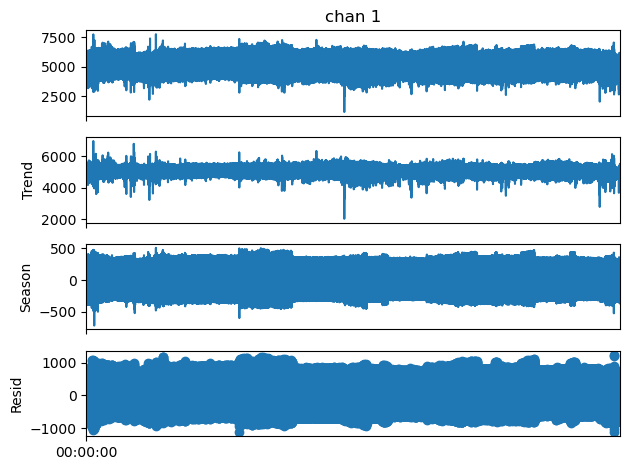

In [61]:
filepath = "files/ucddb007_lifecard.edf"
eeg_seasonal_decomp(filepath)

Extracting EDF parameters from /Users/xintong/Desktop/UMich/Classes/FA23/SI671/project/files/ucddb015_lifecard.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


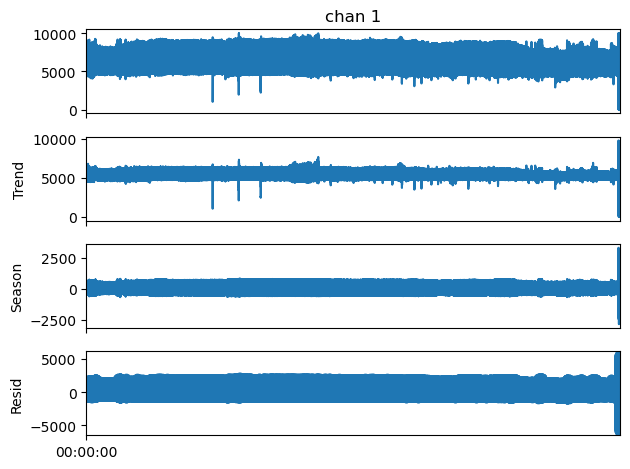

In [62]:
filepath = "files/ucddb015_lifecard.edf"
eeg_seasonal_decomp(filepath)

https://my.clevelandclinic.org/health/diseases/8718-sleep-apnea
stage 1, 2, and REM when sleep apnea happen